<a href="https://colab.research.google.com/github/dishari-roy-7/DogsCats/blob/main/Internshala_DogCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
train_dir= '/content/drive/MyDrive/cats_and_dogs/train'
test_dir= '/content/drive/MyDrive/cats_and_dogs/test'
validation_dir= '/content/drive/MyDrive/cats_and_dogs/validation'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150,150),
          batch_size=20,
          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


training CNN Model

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [15]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [17]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
100/100 [==============================] - 588s 6s/step - loss: 0.6911 - acc: 0.5335 - val_loss: 0.6863 - val_acc: 0.5190
Epoch 2/20
100/100 [==============================] - 71s 707ms/step - loss: 0.6615 - acc: 0.6185 - val_loss: 0.6688 - val_acc: 0.5700
Epoch 3/20
100/100 [==============================] - 71s 708ms/step - loss: 0.6293 - acc: 0.6500 - val_loss: 0.6397 - val_acc: 0.6370
Epoch 4/20
100/100 [==============================] - 71s 709ms/step - loss: 0.5835 - acc: 0.6915 - val_loss: 0.6067 - val_acc: 0.6760
Epoch 5/20
100/100 [==============================] - 72s 723ms/step - loss: 0.5423 - acc: 0.7125 - val_loss: 0.6342 - val_acc: 0.6490
Epoch 6/20
100/100 [==============================] - 71s 712ms/step - loss: 0.5145 - acc: 0.7375 - val_loss: 0.6584 - val_acc: 0.6520
Epoch 7/20
100/100 [==============================] - 71s 709ms/step - loss: 0.4852 - acc: 0.7680 - val_loss: 0.6053 - val_acc: 0.6820
Epoch 8/20
100/100 [==============================] - 72s

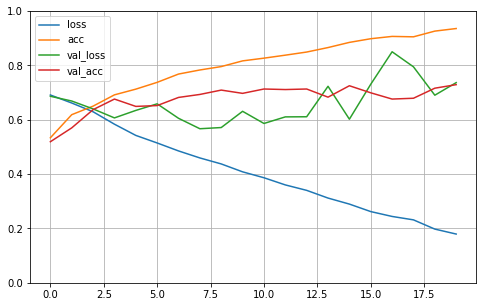

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.save("model.h5")

In [21]:
from tensorflow.keras import backend as K

K.clear_session()
del model

In [22]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
          train_dir,
          target_size=(150, 150),
          batch_size=20,
          class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
          validation_dir,
          target_size=(150,150),
          batch_size=20,
          class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='relu'))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
100/100 [==============================] - 76s 750ms/step - loss: 0.6932 - acc: 0.4840 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 76s 759ms/step - loss: 0.6931 - acc: 0.5115 - val_loss: 0.6910 - val_acc: 0.5000
Epoch 3/100
100/100 [==============================] - 76s 761ms/step - loss: 0.6897 - acc: 0.5250 - val_loss: 0.6873 - val_acc: 0.5590
Epoch 4/100
100/100 [==============================] - 75s 748ms/step - loss: 0.6811 - acc: 0.5635 - val_loss: 0.6665 - val_acc: 0.6030
Epoch 5/100
100/100 [==============================] - 75s 749ms/step - loss: 0.6723 - acc: 0.5630 - val_loss: 0.6626 - val_acc: 0.5840
Epoch 6/100
100/100 [==============================] - 76s 757ms/step - loss: 0.6673 - acc: 0.5885 - val_loss: 0.7077 - val_acc: 0.5050
Epoch 7/100
100/100 [==============================] - 75s 750ms/step - loss: 0.6630 - acc: 0.5770 - val_loss: 0.6732 - val_acc: 0.5860
Epoch 8/100
100/100 [===========================

In [25]:
model.save("project_cnn.h5")

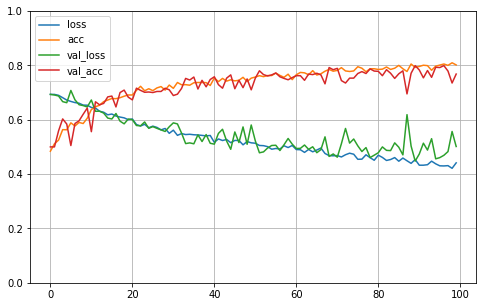

In [26]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()